Importing packages and Loading the Advertising Data

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Read and clean data

In [370]:
data = pd.read_csv('Advertising.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Standardize each column using sklearn

In [371]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convert back to dataframe for better visualization
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)
data_standardized_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [372]:
x = data_standardized[:, :-1]
y = data_standardized[:, -1]

Adding bias

In [373]:
data_standardized_df.insert(0, 'Bias', 1)
data_standardized_df.head()

,Bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


In [374]:
x = data_standardized_df.iloc[:, :-1].values
y = data_standardized_df.iloc[:, -1].values

Divide the dataset into training and testing (0.85 : 0.15)

In [375]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Required Functions:

In [376]:
def initialize_weights(seed=None):
    if seed:
        return np.random.uniform(0, 1, size=(4,))
    else:
        return np.array([0.0, 0.0, 0.0, 0.0])

In [377]:
def predict(x, weights):
    return np.dot(x, weights)

In [378]:
def compute_cost(x, y, weights, m=len(y)):
    y_hat = predict(x, weights)
    return np.sum(np.square(y_hat - y)) / (2 * m)

In [379]:
def compute_gradient(x, y, weights, m=len(y)):
    y_hat = predict(x, weights)

    return np.dot(x.T, (y_hat - y)) / m

In [380]:
def update_weights(x, y, weights, alpha):
    gradient = compute_gradient(x, y, weights)
    return weights - alpha * gradient

In [381]:
def gradient_descent(x, y, weights, alpha, iterations):
    costs = []
    for _ in range(iterations):
        weights = update_weights(x, y, weights, alpha)
        cost = compute_cost(x, y, weights)
        costs.append(cost)
    return weights, costs

In [382]:
def plot_cost(costs, title_param):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs Iterations {title_param}')
    plt.show()

Training the model

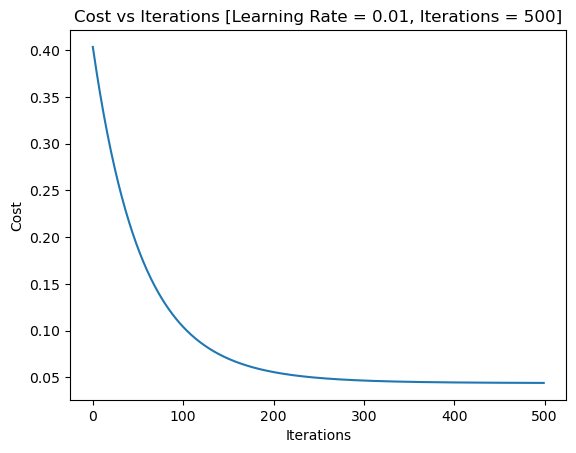

In [383]:
learning_rate = 0.01 #alpha
iterations = 500

weights, costs = gradient_descent(
    x_train, y_train, initialize_weights(), learning_rate, iterations
)

plot_cost(costs, '[Learning Rate = 0.01, Iterations = 500]')

Predict the quantitative response y on the train set and calculate the cost

In [384]:
y_hat_train = predict(x_train, weights)

# Compare Actual vs Predicted Train Values
train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
train_cost = compute_cost(x_train, y_train, weights)
train_mse = mean_squared_error(y_train, y_hat_train)

print(f'Cost: {train_cost}')
print(f'MSE: {train_mse}')
train_df.head()

Cost: 0.043866083899151344
MSE: 0.1032143150568267


,Actual,Predicted
0,-0.657617,-0.282797
1,-0.523115,-0.769531
2,1.859486,1.388781
3,-1.022693,-0.325059
4,0.399182,0.817058


Predict the quantitative response y on the test set

In [385]:
y_hat_test = predict(x_test, weights)

# Compare Actual vs Predicted Test Values
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})
test_cost = compute_cost(x_test, y_test, weights)
test_mse = mean_squared_error(y_test, y_hat_test)

print(f'Cost: {test_cost}')
print(f'MSE: {test_mse}')
test_df.head()

Cost: 0.00821683917806102
MSE: 0.10955785570748026


,Actual,Predicted
0,0.552898,0.455940
1,1.609697,1.291853
2,1.417551,1.431162
3,-1.291696,-0.655187
4,2.051631,1.494829


Revert back to the original form

In [386]:
x_mean = np.mean(data.to_numpy()[:, :-1], axis=0)
x_std = np.std(data.to_numpy()[:, :-1], axis=0)

x_original = x.copy()
# Do not include the bias in the calculation
x_original[:, 1:] = x_original[:, 1:] * x_std + x_mean

# Convert to df for better visualization
x_original_df = pd.DataFrame(x_original, columns=data_standardized_df.columns[:-1])
x_original_df.head()

,Bias,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


Questions

1. What are optimal weights found by your implemented gradient descent? Plug it into the linear model:

In [387]:
bias = weights[0]
theta_tv = weights[1]
theta_radio = weights[2]
theta_newspaper = weights[3]

print(f'h_theta(x) = {bias} + {theta_tv}TV + {theta_radio}Radio + {theta_newspaper}Newspaper')

h_theta(x) = 0.0019060625334216344 + 0.7276734116137625TV + 0.5180251980677989Radio + 0.02363435095095758Newspaper


What are your interpretations regarding the formed linear model?

2. Provide a scatter plot of the $\hat{(y^{(i)})}$ and $y^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

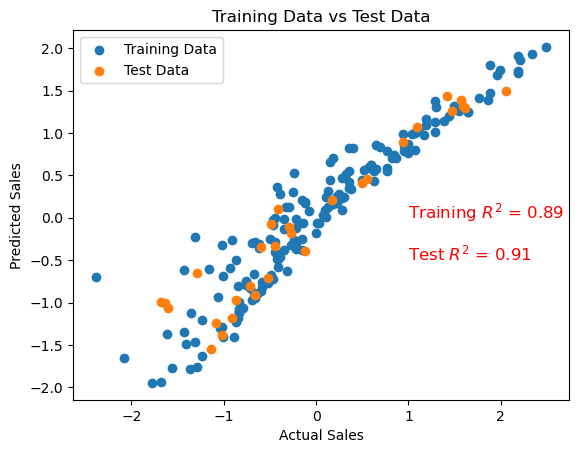

In [388]:
plt.scatter(y_train, y_hat_train, label='Training Data')
plt.scatter(y_test, y_hat_test, label='Test Data')
plt.title("Training Data vs Test Data")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(loc="best")

train_r2 = r2_score(y_train, y_hat_train)
plt.text(1, 0, f"Training $R^2$ = {train_r2:.2f}", fontsize=12, color="red")
test_r2 = r2_score(y_test, y_hat_test)
plt.text(1, -0.5, f"Test $R^2$ = {test_r2:.2f}", fontsize=12, color="red")
plt.show()

3. What happens to the error, $R^2$, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

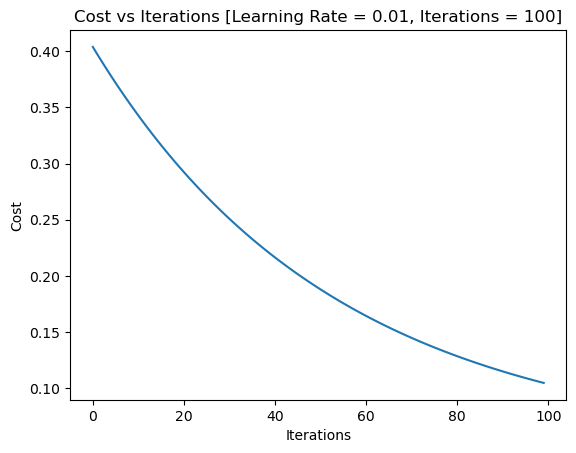

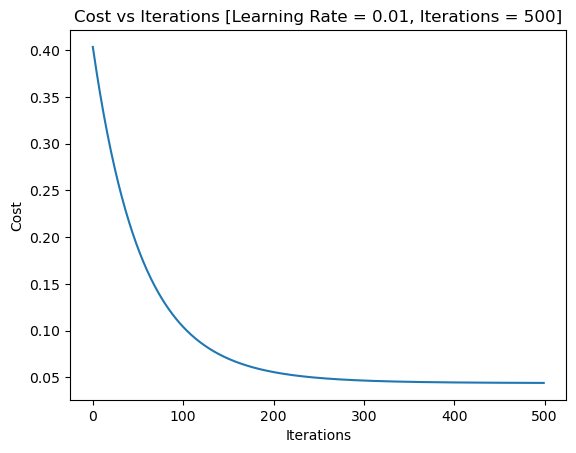

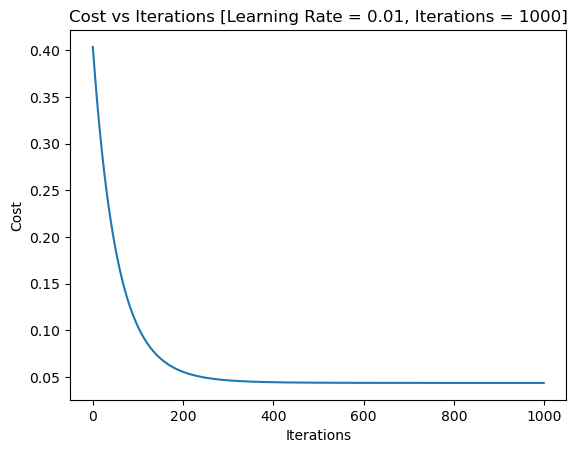

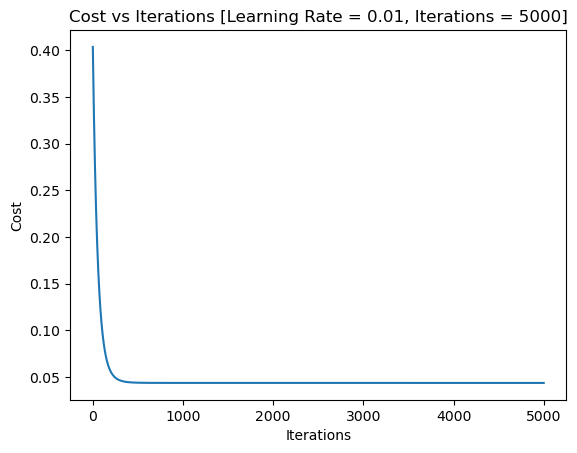

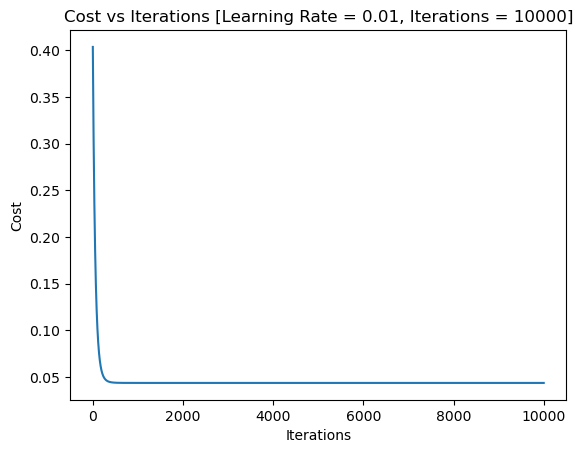

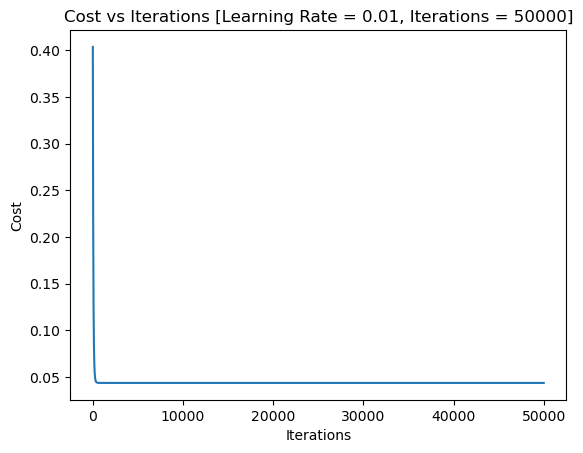

Iterations: 100, Train R2: 0.7444346754732712, Test MSE: 0.24679613666795946, Final Cost: 0.10488835808388278
Iterations: 500, Train R2: 0.893118262386777, Test MSE: 0.1032143150568267, Final Cost: 0.043866083899151344
Iterations: 1000, Train R2: 0.8936762323792866, Test MSE: 0.10267549063382253, Final Cost: 0.04363708351937458
Iterations: 5000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.043635800522933546
Iterations: 10000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.043635800522933546
Iterations: 50000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.043635800522933546


In [389]:
# Learning rate = 0.01
iterations_list = [100, 500, 1000, 5000, 10000, 50000]

# Dictionary to store the results
results = {}

# Loop through the different iteration counts
for iterations in iterations_list:
    theta, costs = gradient_descent(
        x_train, y_train, initialize_weights(), learning_rate, iterations
    )

    y_train_pred = predict(x_train, theta)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store the results
    results[iterations] = {"theta": theta, "costs": costs, "train_r2": train_r2, "train_mse": train_mse}

    plot_cost(costs, f'[Learning Rate = 0.01, Iterations = {iterations}]')

# Print Iterations and Corresponding Test MSE
for iterations, result in results.items():
    print(f"Iterations: {iterations}, Train R2: {result['train_r2']}, Test MSE: {result['train_mse']}, Final Cost: {result['costs'][-1]}")

Determining the optimal number of iterations:

As observed from above the result of the iterations above, starting from 1000, the value of cost did not significantly decrease. 

4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

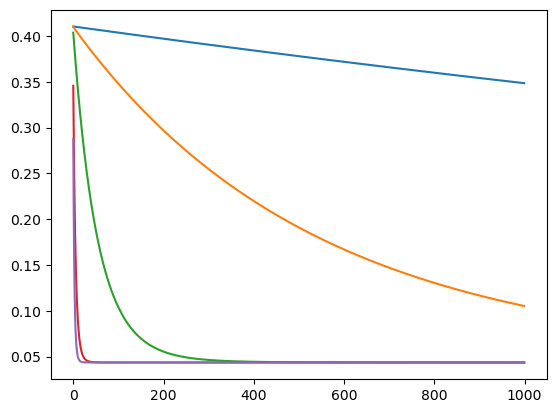

In [390]:
optimal_iteration = 1000
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2]

costs_arr = []
for learning_rate in learning_rates:
    theta, costs = gradient_descent(
        x_train, y_train, initialize_weights(), learning_rate, optimal_iteration
    )
    plt.plot(costs, label=learning_rate)

    y_train_pred = predict(x_train, theta)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    costs_arr.append(costs)
plt.show()